### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
tr = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
tr

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [3]:
# Any missing values?
print(tr.isnull().sum())

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


In [4]:
# Explore the data.
print(tr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB
None


In [5]:
print(tr.shape)

(2000, 11)


In [6]:
# Descriptive statistics.
tr.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [7]:
# Drop unnecessary columns.
tr_new = tr.drop(['language', 'platform'], axis=1)

# View column names.
tr_new.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [8]:
# Rename the column headers.
tr_new = tr_new.rename(columns={'remuneration (k£)': 'renumeration', 'spending_score (1-100)':'spending_score'})

# View column names.
tr_new.columns

Index(['gender', 'age', 'renumeration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [9]:
# Create a CSV file as output.
tr_new.to_csv('tr_new.csv', index=False)

In [10]:
# Import new CSV file with Pandas.
tr_newdf = pd.read_csv('tr_new.csv')

# View DataFrame.
tr_newdf

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [11]:
# Any missing values?
print(tr_newdf.isnull().sum())

gender            0
age               0
renumeration      0
spending_score    0
loyalty_points    0
education         0
product           0
review            0
summary           0
dtype: int64


In [12]:
# Explore the data.
print(tr_newdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   renumeration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


In [13]:
print(tr_newdf.shape)

(2000, 9)


In [14]:
# Descriptive statistics.
tr_newdf.describe()

,age,renumeration,spending_score,loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 5. Linear regression

### 5a) spending vs loyalty

###### Breusch-Pagan Test

In [15]:
# Import necessary libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan
import pandas as pd

# Create the OLS model
model = ols('loyalty_points ~ spending_score', data=tr_newdf)

# Fit the model
test = model.fit()

# Get the residuals from the fitted model
residuals = test.resid

# Convert exog array to a DataFrame
exog_df = pd.DataFrame(test.model.exog, columns=test.model.exog_names)

# Run the Breusch-Pagan test
test_results = het_breuschpagan(residuals, exog_df)

# Extract the p-value
p_value = test_results[1]

# Print the p-value
print('Breusch-Pagan Test p-value:', p_value)


Breusch-Pagan Test p-value: 5.042699614942813e-139


The Breusch-Pagan test p-value obtained is very small (5.04e-139), which suggests strong evidence against the null hypothesis of homoscedasticity. Therefore, there is heteroscedasticity in the regression model. This means that the variance of the errors is not constant across all levels of the independent variable.¶
log transformation on spending_score to address heteroscedasticity

###### Log transaformation of loyalty_points

In [16]:
# Import necessary libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan
import pandas as pd
import numpy as np

# Create the OLS model with log transformation
model = ols('np.log(loyalty_points) ~ spending_score', data=tr_newdf)

# Fit the model
test = model.fit()

# Get the residuals from the fitted model
residuals = test.resid

# Convert exog array to a DataFrame
exog_df = pd.DataFrame(test.model.exog, columns=test.model.exog_names)

# Run the Breusch-Pagan test
test_results = het_breuschpagan(residuals, exog_df)

# Extract the p-value
p_value = test_results[1]

# Print the p-value
print('Breusch-Pagan Test p-value:', p_value)

Breusch-Pagan Test p-value: 6.900660585141494e-22


The new p-value obtained from the Breusch-Pagan test is 6.900660585141494e-22, which is significantly smaller than the significance level of 0.05. This suggests that there is still evidence of heteroscedasticity even after the log transformation

###### Below regression model and results on spending_score vs. loyalty_points shall not be considered due to heteroscedasticity issue in the data

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     2153.
Date:                Sat, 22 Apr 2023   Prob (F-statistic):          1.44e-319
Time:                        10:54:48   Log-Likelihood:                -2146.7
No. Observations:                2000   AIC:                             4297.
Df Residuals:                    1998   BIC:                             4309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7870      0.017    162.833      0.000       2.753       2.821
X[0]           2.7870      0.017    162.833      0.000       2.753       2.821
X[1]           0.0282      0.001     46.400      0.000       0.027       0.029
==============================================================================
Omnibus:                      247.764   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              344.804
Skew:                          -1.000   Prob(JB):                     1.34e-75
Kurtosis:                       3.366   Cond. No.                     1.06e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.72e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

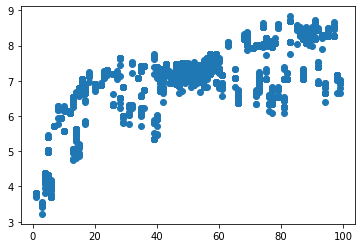

In [17]:
# Independent variable (logged).
X = tr_newdf['spending_score']

# Dependent variable.
y = np.log(tr_newdf['loyalty_points'])

# Check for linearity.
plt.scatter(X, y)

# Add a constant term to the independent variable.
X = sm.add_constant(X)

# Run the OLS test.
f = 'y ~ X'
test = ols(f, data=tr_newdf).fit()

# View the output.
test.summary()


0       6.672356
1       7.855221
2       5.742962
3       7.742567
4       6.700519
          ...   
1995    7.517259
1996    5.799289
1997    8.136855
1998    6.024597
1999    5.799289
Name: spending_score, Length: 2000, dtype: float64


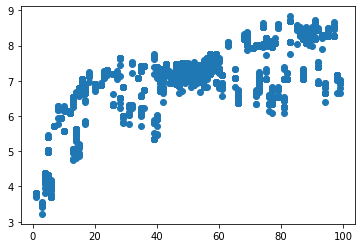

In [18]:
import numpy as np

# Independent variable.
X = tr_newdf['spending_score']

# Dependent variable.
y = tr_newdf['loyalty_points']

# Apply natural logarithm to loyalty_points.
ln_y = np.log(y)

# Check for linearity.
plt.scatter(X,ln_y)

# Run the OLS test.
f = 'ln_y ~ X'
test = ols(f, data=tr_newdf).fit()

# View the output.
test.summary()

# Set the constant (intercept) and coefficient values.
intercept = test.params[0]
coef = test.params[1]

# Set the predicted values.
y_pred = intercept + coef * X

# View the output.
print(y_pred)


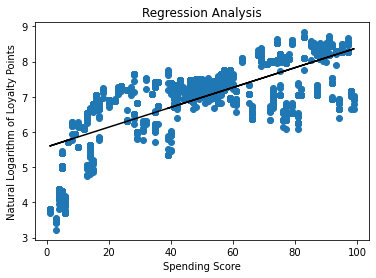

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Apply the natural logarithm to the "Loyalty Points" variable.
ln_y = np.log(y)

# Fit a linear regression model to the data.
slope, intercept = np.polyfit(X, ln_y, 1)
ln_y_pred = slope * X + intercept

# Plot the scatter plot with the "Loyalty Points" variable on the y-axis and the independent variable on the x-axis.
plt.scatter(X, ln_y)

# Plot the regression line.
plt.plot(X, ln_y_pred, color='black')

# Add labels and a title.
plt.xlabel('Spending Score')
plt.ylabel('Natural Logarithm of Loyalty Points')
plt.title('Regression Analysis')

# Show the plot.
plt.show()


### 5b) renumeration vs loyalty

###### Breusch-Pagan Test

In [20]:
# Import necessary libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan
import pandas as pd

# Create the OLS model
model = ols('loyalty_points ~ renumeration', data=tr_newdf)

# Fit the model
test = model.fit()

# Get the residuals from the fitted model
residuals = test.resid

# Convert exog array to a DataFrame
exog_df = pd.DataFrame(test.model.exog, columns=test.model.exog_names)

# Run the Breusch-Pagan test
test_results = het_breuschpagan(residuals, exog_df)

# Extract the p-value
p_value = test_results[1]

# Print the p-value
print('Breusch-Pagan Test p-value:', p_value)


Breusch-Pagan Test p-value: 7.153051772822205e-228


The Breusch-Pagan test p-value obtained is very small, which suggests strong evidence against the null hypothesis of homoscedasticity. Therefore, there is heteroscedasticity in the regression model. This means that the variance of the errors is not constant across all levels of the independent variable

##### Log Transformation of loyalty_points to improve heteroscedasticity 

In [21]:
# Import necessary libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan
import pandas as pd
import numpy as np

# Create the OLS model with log transformation
model = ols('np.log(loyalty_points) ~ renumeration', data=tr_newdf)

# Fit the model
test = model.fit()

# Get the residuals from the fitted model
residuals = test.resid

# Convert exog array to a DataFrame
exog_df = pd.DataFrame(test.model.exog, columns=test.model.exog_names)

# Run the Breusch-Pagan test
test_results = het_breuschpagan(residuals, exog_df)

# Extract the p-value
p_value = test_results[1]

# Print the p-value
print('Breusch-Pagan Test p-value:', p_value)

Breusch-Pagan Test p-value: 0.8272107748022121


The p-value of the Breusch-Pagan test of 0.8272107748022121, is relatively large. This suggests that there is not enough evidence to reject the null hypothesis of constant variance of the errors, and we can assume that the variance of the errors is constant for the regression model.

###### Simple Regression of renumeration vs. log transformed loyalty points

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     794.3
Date:                Sat, 22 Apr 2023   Prob (F-statistic):          1.98e-147
Time:                        10:54:49   Log-Likelihood:                -2543.1
No. Observations:                2000   AIC:                             5090.
Df Residuals:                    1998   BIC:                             5101.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9253      0.022    131.318      0.000       2.882       2.969
X[0]           2.9253      0.022    131.318      0.000       2.882       2.969
X[1]           0.0235      0.001     28.184      0.000       0.022       0.025
==============================================================================
Omnibus:                      610.463   Durbin-Watson:                   2.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1512.287
Skew:                          -1.669   Prob(JB):                         0.00
Kurtosis:                       5.647   Cond. No.                     1.47e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.62e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

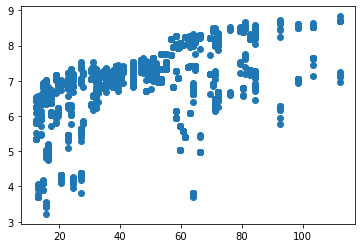

In [22]:
# Independent variable (logged).
X = tr_newdf['renumeration']

# Dependent variable.
y = np.log(tr_newdf['loyalty_points'])

# Check for linearity.
plt.scatter(X, y)

# Add a constant term to the independent variable.
X = sm.add_constant(X)

# Run the OLS test.
f = 'y ~ X'
test = ols(f, data=tr_newdf).fit()

# View the output.
test.summary()

0       -114.229800
1       -114.229800
2        -25.298173
3        -25.298173
4         58.240251
           ...     
1995    2540.660300
1996    2668.340645
1997    2668.340645
1998    2751.161566
1999    2668.340645
Name: renumeration, Length: 2000, dtype: float64


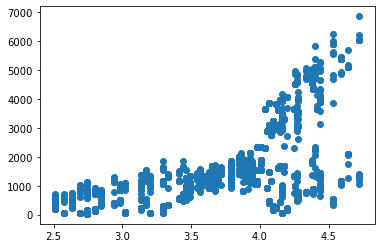

In [23]:
import numpy as np

# Independent variable.
X = tr_newdf['renumeration']

# Dependent variable.
y = tr_newdf['loyalty_points']

# Apply natural logarithm to independent variable.
ln_X = np.log(X)

# Check for linearity.
plt.scatter(ln_X, y)

# Run the OLS test.
f = 'y ~ ln_X'
test = ols(f, data=tr_newdf).fit()

# View the output.
test.summary()

# Set the constant (intercept) and coefficient values.
intercept = test.params[0]
coef = test.params[1]

# Set the predicted values.
y_pred = intercept + coef * ln_X

# View the output.
print(y_pred)

1. The R-squared value is 0.284, indicating that the regression model explains approximately 28.4% of the variance in the dependent variable.

2. The F-statistic is 794.3 and is statistically significant with a very small p-value of 1.98e-147. This indicates that at least one independent variable in the model is significantly related to the dependent variable.

3. However, the coefficient for the first independent variable (X[0]) is 2.9253, which is identical to the intercept. This indicates that there might be an issue of perfect multicollinearity between the intercept and the first independent variable.

4. The condition number is very large, indicating that there may be issues of multicollinearity or a poorly scaled design matrix. This can affect the stability and interpretability of the regression coefficients.

### 5c) age vs loyalty

##### Breusch-Pagan Test

In [24]:
# Import necessary libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan
import pandas as pd

# Create the OLS model
model = ols('loyalty_points ~ age', data=tr_newdf)

# Fit the model
test = model.fit()

# Get the residuals from the fitted model
residuals = test.resid

# Convert exog array to a DataFrame
exog_df = pd.DataFrame(test.model.exog, columns=test.model.exog_names)

# Run the Breusch-Pagan test
test_results = het_breuschpagan(residuals, exog_df)

# Extract the p-value
p_value = test_results[1]

# Print the p-value
print('Breusch-Pagan Test p-value:', p_value)

Breusch-Pagan Test p-value: 0.00030407066519251314


The p-value of the Breusch-Pagan test is 0.00030407066519251314, which is a small value (P<0.05), this indicates some evidence against the null hypothesis of homoscedasticity and suggests that the errors in the regression model may have non-constant variance. 

###### Apply log method to the loyalty_points

In [25]:
# Import necessary libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan
import pandas as pd
import numpy as np

# Create the OLS model with log transformation
model = ols('np.log(loyalty_points) ~ age', data=tr_newdf)

# Fit the model
test = model.fit()

# Get the residuals from the fitted model
residuals = test.resid

# Convert exog array to a DataFrame
exog_df = pd.DataFrame(test.model.exog, columns=test.model.exog_names)

# Run the Breusch-Pagan test
test_results = het_breuschpagan(residuals, exog_df)

# Extract the p-value
p_value = test_results[1]

# Print the p-value
print('Breusch-Pagan Test p-value:', p_value)

Breusch-Pagan Test p-value: 0.16765562765439973


##### After log transformation of the age data, P value 0.16765562765439973 of the Breusch-Pagan test indicates weak evidence against the null hypothesis of homoscedasticity. Below regression model with log transofrmed age shall be considered in the analysis. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.393
Date:                Sat, 22 Apr 2023   Prob (F-statistic):              0.122
Time:                        10:54:49   Log-Likelihood:                -2876.7
No. Observations:                2000   AIC:                             5757.
Df Residuals:                    1998   BIC:                             5769.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5424      0.035    100.926      0.000       3.474       3.611
X[0]           3.5424      0.035    100.926      0.000       3.474       3.611
X[1]          -0.0026      0.002     -1.547      0.122      -0.006       0.001
==============================================================================
Omnibus:                      392.087   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              748.718
Skew:                          -1.180   Prob(JB):                    2.62e-163
Kurtosis:                       4.847   Cond. No.                     5.01e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.39e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

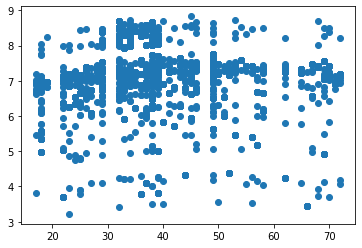

In [26]:
# Independent variable (logged).
X = tr_newdf['age']

# Dependent variable.
y = np.log(tr_newdf['loyalty_points'])

# Check for linearity.
plt.scatter(X, y)

# Add a constant term to the independent variable.
X = sm.add_constant(X)

# Run the OLS test.
f = 'y ~ X'
test = ols(f, data=tr_newdf).fit()

# View the output.
test.summary()

1. The R-squared value is 0.001, indicating that the regression model explains only a very small portion of the variance in the dependent variable.
2. The F-statistic is 2.393 and is not statistically significant with a p-value of 0.122. This indicates that there is not enough evidence to conclude that the model as a whole is a good fit for the data.

##### Multi Linear Regress of renumeration & spending_score vs. loyalty_points

In [27]:
# Import all the necessary packages.
import pandas as pd 
import numpy as np 
import scipy as scp
import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt  

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

In [28]:
tr_new['loyalty_points']

0        210
1        524
2         40
3        562
4        366
        ... 
1995    4031
1996     539
1997    5614
1998    1048
1999     479
Name: loyalty_points, Length: 2000, dtype: int64

In [29]:
# Set the independent variable.  
X = tr_new.drop(['gender','age','education','product','review','summary','loyalty_points'], axis=1) 
# Set the dependent variable. 
y = tr_new['loyalty_points']   

# Print to check that the sex column has been dropped.
print(list(X.columns.values))  

# Specify the train and test data sets and 
# use 30% as the 'test_size' and a random_state of one.
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.30, random_state=1)


['renumeration', 'spending_score']


##### Build the model¶

In [30]:
# Import the MinMaxScaler to normalise the data.
from sklearn.preprocessing import MinMaxScaler  

# Normalize the independent variables
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the OLS model and print the results
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:         loyalty_points   R-squared (uncentered):                   0.876
Model:                            OLS   Adj. R-squared (uncentered):              0.876
Method:                 Least Squares   F-statistic:                              4927.
Date:                Sat, 22 Apr 2023   Prob (F-statistic):                        0.00
Time:                        10:54:50   Log-Likelihood:                         -11209.
No. Observations:                1400   AIC:                                  2.242e+04
Df Residuals:                    1398   BIC:                                  2.243e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

##### Check for heteroscedasticity using the Breusch-Pagan Test

In [31]:
# Import the required module
from statsmodels.stats.diagnostic import het_breuschpagan

# Get the residuals from the OLS model
residuals = model.resid

# Get the predicted values from the OLS model
predicted = model.predict()

# Calculate the test statistics and p-values using the Breusch-Pagan Test
test_statistics, p_value, _, _ = het_breuschpagan(residuals, X_train)

# Print the results
print("Breusch-Pagan Test Results:")
print("Test Statistic: ", test_statistics)
print("p-value: ", p_value)


Breusch-Pagan Test Results:
Test Statistic:  695.9948275394719
p-value:  2.2215637145154704e-153


Based on the Breusch-Pagan test, the test statistic is 695.99 and the p-value is 2.22e-153, which is very small. This indicates that there is significant evidence to reject the null hypothesis of homoscedasticity, and we can conclude that the errors are heteroscedastic.

##### Re-run the test with natural log of loyalty_points

In [32]:
# Set the independent variable.  
X = tr_new.drop(['gender','age','education','product','review','summary','loyalty_points'], axis=1) 
# Set the dependent variable. 
y = np.log(tr_new['loyalty_points'])  

# Print to check that the sex column has been dropped.
print(list(X.columns.values))  

# Specify the train and test data sets and 
# use 30% as the 'test_size' and a random_state of one.
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.30, random_state=1)

['renumeration', 'spending_score']


##### Build the model

In [33]:
# Import the MinMaxScaler to normalise the data.
from sklearn.preprocessing import MinMaxScaler  

# Normalize the independent variables
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the OLS model and print the results
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:         loyalty_points   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.930
Method:                 Least Squares   F-statistic:                              9317.
Date:                Sat, 22 Apr 2023   Prob (F-statistic):                        0.00
Time:                        10:54:50   Log-Likelihood:                         -2861.3
No. Observations:                1400   AIC:                                      5727.
Df Residuals:                    1398   BIC:                                      5737.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

##### Check for heteroscedasticity using the Breusch-Pagan Test

In [34]:
# Import the required module
from statsmodels.stats.diagnostic import het_breuschpagan

# Get the residuals from the OLS model
residuals = model.resid

# Get the predicted values from the OLS model
predicted = model.predict()

# Calculate the test statistics and p-values using the Breusch-Pagan Test
test_statistics, p_value, _, _ = het_breuschpagan(residuals, X_train)

# Print the results
print("Breusch-Pagan Test Results:")
print("Test Statistic: ", test_statistics)
print("p-value: ", p_value)

Breusch-Pagan Test Results:
Test Statistic:  454.35614991840134
p-value:  8.130305207205349e-101


Based on the Breusch-Pagan Test results, the test statistic is quite large and the p-value is very small, indicating strong evidence against the null hypothesis of constant error variance. Therefore, it can be concluded that there is heteroscedasticity in the model.

Based on the OLS Regression Results, the R-squared value of 0.93 indicates that the model can explain 93% of the variance in the dependent variable, loyalty points. The F-statistic of 9317 and a low p-value of 0.00 suggest that the model is statistically significant and is a good fit for the data. However, the Breusch-Pagan test for heteroscedasticity reveals strong heteroscedasticity in the model. Therefore, it is not appropriate to make conclusions using the regression model.

## 6. Observations and insights

***Your observations here...***






##### 5a) spending vs loyalty 

The Breusch-Pagan Test indicated heteroscedasticity. The degree of uncertainty in the predictions varies depending on the value of the independent variable. This can lead to biased estimates of the regression coefficients and inaccurate predictions. Therefore results of the this test should be considered as biased. Should not take any action based on these test results.

##### 5b) renumeration vs loyalty

The regression model has an R-squared value of 0.284, indicating that it explains about 28.4% of the variance in the dependent variable. The F-statistic of 794.3 is statistically significant with a very small p-value of 1.98e-147, indicating that at least one independent variable is significantly related to the dependent variable. However, there might be an issue of perfect multicollinearity between the intercept and the first independent variable, as they have the same coefficient of 2.9253. Additionally, the large condition number suggests the possibility of multicollinearity or a poorly scaled design matrix, which could impact the stability and interpretability of the regression coefficients.

###### 5c) age vs loyalty

The regression model has a very low R-squared value of 0.001, indicating that it explains only a very small portion of the variance in the dependent variable. Additionally, the F-statistic of 2.393 is not statistically significant with a p-value of 0.122, suggesting that there is not enough evidence to conclude that the model is a good fit for the data.

Overall, it seems that the model is not a good fit for the data and age is not a good predictor of the loyalty.

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [35]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [36]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('tr_new.csv')

# View DataFrame.
df2

# Summary of df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   renumeration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [37]:
# Drop unnecessary columns.
df2 = df2.drop(columns=['age', 'loyalty_points', 'education', 'product', 'review', 'summary'])

# View DataFrame.
df2

,gender,renumeration,spending_score
0,Male,12.30,39
1,Male,12.30,81
2,Female,13.12,6
3,Female,13.12,77
4,Female,13.94,40
...,...,...,...
1995,Female,84.46,69
1996,Female,92.66,8
1997,Male,92.66,91
1998,Male,98.40,16


In [38]:
# Explore the data.
# Determine the number of null values.
df2.isnull().sum()

gender            0
renumeration      0
spending_score    0
dtype: int64

In [39]:
# Descriptive statistics.
df2.describe()

,renumeration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

<AxesSubplot:xlabel='renumeration', ylabel='spending_score'>

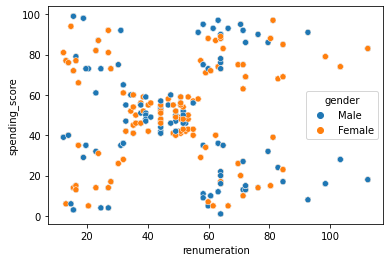

In [40]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='renumeration',
                y='spending_score',
                data=df2,hue='gender')

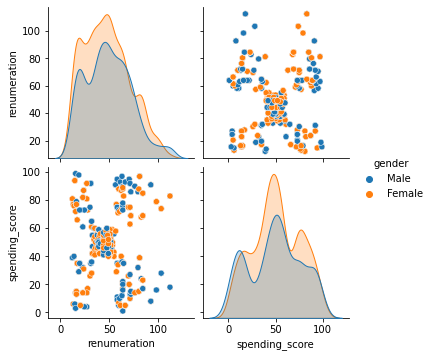

In [41]:
# Create a pairplot with Seaborn.
x = df2[['renumeration', 'spending_score']]

sns.pairplot(df2,
             vars=x, 
             hue='gender',
             diag_kind= 'kde')

## 3. Elbow and silhoutte methods

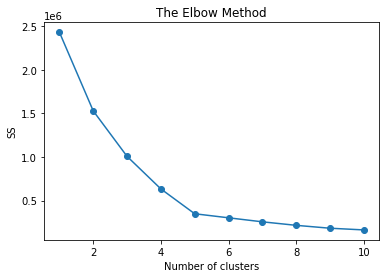

In [42]:
# Determine the number of clusters: Elbow method.
# Elbow chart for us to decide on the number of optimal clusters.
ss = []
# Testing Custer Size from 1 to 11
# Create an object kmeans based on the KMeans() class, and specify the parameters. 
# Set the number of clusters to the current iteration of the loop (n_clusters=i). 
# Use the improved k‑means++ algorithm for this process. 
# For this example, let’s use the maximum number of algorithms for a single run as 500, 
# n_init=10 (default number), and random_state=42.
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

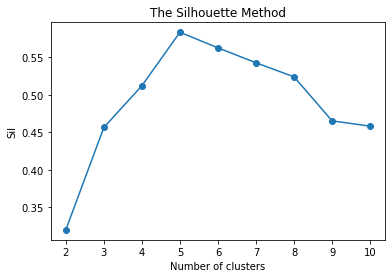

In [43]:
# Determine the number of clusters: Silhouette method.
# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

##### According to the Elbow Method, cluster 4,5,6 seems would be reasonable to test out as adding another cluster beyond 6 does not give much better modeling of the data. Also, according to the Shilouette Method, the average shilouette peaked at 5 clusters, thus 4,5,6 clusters are worth to test out to see which cluster is the ideal number of clusters for modelling.

In [44]:
# Start with 4 clusters

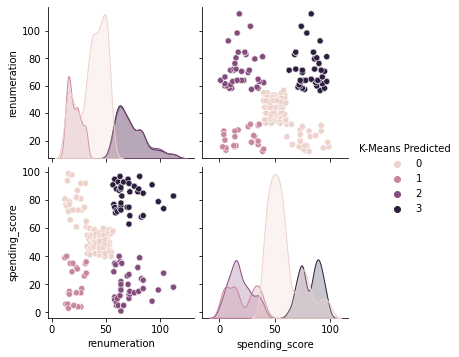

In [45]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4,
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [46]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

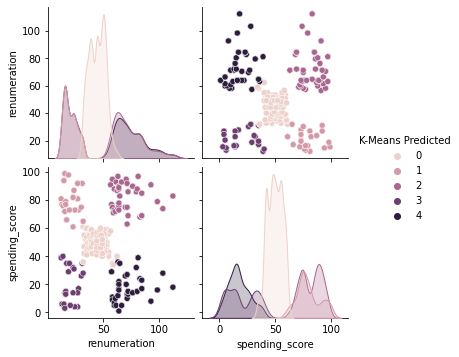

In [47]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [48]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

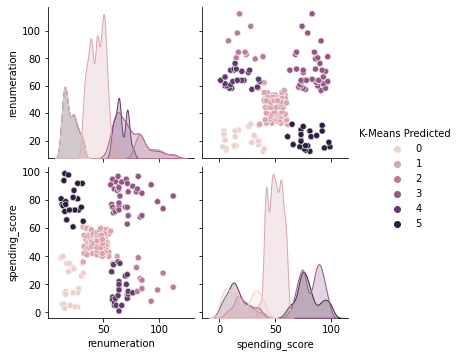

In [49]:
# Try 6 clusters: 
kmeans = KMeans(n_clusters = 6,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [50]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    767
3    356
0    271
5    269
4    214
2    123
Name: K-Means Predicted, dtype: int64

## 5. Fit final model and justify your choice

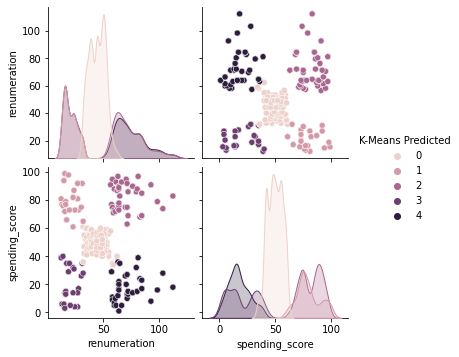

In [51]:
# Apply the final model.
# Final model as K = 5
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [52]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

   renumeration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  1
2         13.12               6                  3
3         13.12              77                  1
4         13.94              40                  3


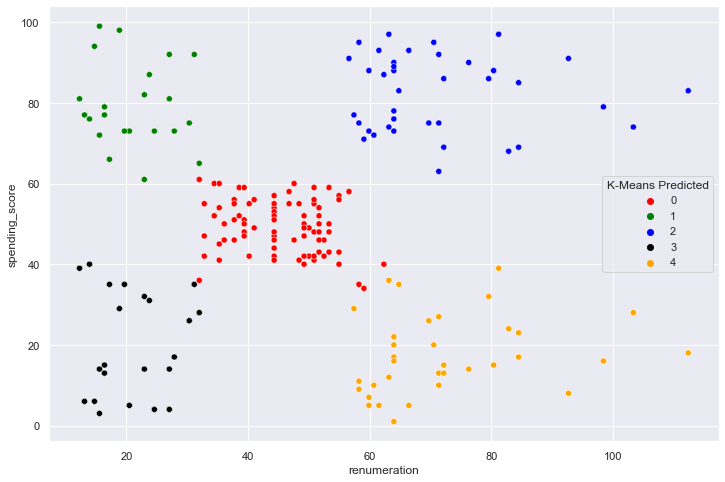

In [53]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='renumeration' , 
                y ='spending_score',
                data=x ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

# View the DataFrame.
print(x.head())

In [54]:
# Visualising the clusters.



## 7. Discuss: Insights and observations

***Your observations here...***

###### 1. Used Elbow Method and identify K = 4 OR 5 OR 6 seems would be reasonable to test out as adding another cluster beyond 6 does not give much better modeling of the data.

##### 2. Shilouette Method indicated 5 Clusters would be give best cliusterring as the object is well matched to its own cluster and poorly matched to neighboring clusters.

##### 3. After testing the models of K=4, K=5, K=6. K=5 would make the best sense as it suceessfully divided the customers into 4 distinctive groups: 
1. Cluster 0 are custoemrs that have medium spending score and medium renumeration and this is the biggest group of custoemrs.
2. Cluster 1 are customers who has low renumeration but spending a lot with us. Would be meaniningful to further investigate if they are student or teenages and keen on buying our products.
3. Cluster 2 are the customers with high renumerationa ndhigh spending with us. Would be meaningful to see who are these customers and perhaps motivate them to spend even more with us as they have strong purchasing power.
4. Cluster 3 are customers with low renumberation and low spending with us. Perhaps is not so meaningfult o do anything to encourage them to spend more due to limitation in their puchasing power and the exisiting low interest in our products.
5. Cluster 4 are customers with high renumeration but low spending with us. Would meaningful to further investigate why are they not buying products from us, e.g. are they spenidng much more with out competitors?

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [55]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

These codes are importing various Python packages that are commonly used in text analysis and visualization:

pandas and numpy are used for working with data in tabular format and performing numerical computations, respectively.
nltk (Natural Language Toolkit) is a library used for processing and analyzing natural language data, including tokenization, stemming, and tagging.
os is used for operating system level operations such as navigating files and directories.
matplotlib.pyplot is a plotting library used to create visualizations such as histograms, line charts, and scatter plots.
WordCloud is a package used to create word clouds, which are visual representations of text data where the size of each word corresponds to its frequency.
TextBlob is a package used for natural language processing, including sentiment analysis.
FreqDist is a class from nltk.probability used to calculate the frequency distribution of a list of words.
stopwords is a class from nltk.corpus that contains a list of common stop words that are often removed from text data in natural language processing.
norm is a class from scipy.stats used to generate normal distributions.
Counter is a class from collections used to count the frequency of elements in a list.
In addition to importing these packages, the code also downloads two resources from the nltk library: the punkt tokenizer and the list of English stop words. Finally, the code also suppresses any warnings that may be generated during the execution of the code.

In [56]:
# Load the data set as df3.
df3 = pd.read_csv('tr_new.csv')

# View DataFrame.
df3

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [57]:
# Explore data set.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   renumeration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [58]:
# Keep necessary columns. Drop unnecessary columns.
# since we are working on NLP, so we only need the review and summary columns
df3 = df3.loc[:, ["review", "summary"]]

# View DataFrame.
df3

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [59]:
# Determine if there are any missing values.
if df3.isnull().any().any():
    print("There are missing values in df3.")
else:
    print("There are no missing values in df3.")

There are no missing values in df3.


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

Converting all the text in the 'review' column to lowercase and joins the words back together with a space separator.

Lowercasing the text is important because it ensures that words with the same spelling but different capitalization are treated as the same word (e.g., 'Game', 'game', and 'GAME' are all converted to 'game'). This is necessary because most natural language processing tools treat these as different words by default.

Joining the words back together with a space separator is important because it creates a continuous string of text that can be processed more easily by natural language processing tools. Without joining the words, the text would be a list of separate words that are harder to analyze as a single text string.

Overall, this preprocessing step is important to standardize the text in the 'review' & 'summary' column and make it more amenable to analysis with natural language processing tools.

In [60]:
# Review: Change all to lower case and join with a space.
df3["review"] = df3["review"].apply(lambda x: " ".join(x.lower() for x in x.split()))

df3.head()

,review,summary
0,"when it comes to a dm's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*: your unpainted ...,Another worthless Dungeon Master's screen from...
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,Five Stars
4,as my review of gf9's previous screens these w...,Money trap


In [61]:
# Summary: Change all to lower case and join with a space.
df3["summary"] = df3["summary"].apply(lambda x: " ".join(x.lower() for x in x.split()))

# quick review of df3
df3.head()

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap


### 2b) Replace punctuation in each of the columns respectively (review and summary)

To remove all non-letter, non-digit, and non-space characters from the 'review' column of the df3 dataframe. Specifically, it uses the str.replace() method to replace any character in the 'review' column that is not a letter, digit, or space character with an empty string.

The regular expression pattern [a-zA-Z0-9 ] matches any lowercase letter, uppercase letter, digit, or space character. The caret ^ at the beginning of the pattern negates it, so the pattern matches any character that is not a lowercase letter, uppercase letter, digit, or space character. The resulting effect is that any punctuation or other non-alphanumeric characters in the 'review' column are removed.

This preprocessing step is useful for several reasons. First, it helps to standardize the text in the 'review' column and remove any unwanted characters that may interfere with natural language processing tools. Second, it helps to reduce the dimensionality of the text data, which can improve the performance of some natural language processing algorithms. Finally, it can make the text data easier to read and understand for human readers, as it removes any distracting or irrelevant characters.

In [62]:
# Replace all the punctuations in review column.
# Replace all non-letter, non-digit, and non-space characters in 'review' column.
df3['review'] = df3['review'].str.replace('[^a-zA-Z0-9 ]','')

# View output.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [63]:
# Replace all the puncuations in summary column.
# Replace all non-letter, non-digit, and non-space characters in 'summary' column.
df3['summary'] = df3['summary'].str.replace('[^a-zA-Z0-9 ]','')

# View output.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [64]:
# Check the number of duplicate values in the review column.
print(df3.review.duplicated().sum())

# Check the number of duplicate values in the summary column.
print(df3.summary.duplicated().sum())

50
649


In [65]:
# Drop duplicates in both columns.
df3 = df3.drop_duplicates(subset=['review', 'summary'], keep='first')

# View DataFrame.
print(df3.shape)

(1961, 2)


## 3. Tokenise and create wordclouds

In [66]:
# Create new DataFrame (copy DataFrame).
df4 = df3.copy()

# View DataFrame.
df4

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1996,great game did not think i would like it when ...,super fun
1997,great game for all keeps the mind nimble,great game
1998,fun game,four stars


In [67]:
from nltk import word_tokenize

# Apply tokenisation to 'summary' column
df4['summary_token'] = df4['summary'].apply(word_tokenize)
# Apply tokenisation to 'review' column
df4['review_token'] = df4['review'].apply(word_tokenize)


# View DataFrame.
print(df4['summary_token'].head())
print(df4['review_token'].head())

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: summary_token, dtype: object
0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: review_token, dtype: object


In [68]:
# Review: Create a word cloud for 'review_token'.
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Define stop words
stop_words = set(stopwords.words('english'))

# Remove stop words from each row
df4['review_token_no_stopwords'] = df4['review_token'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Combine all the tokens in all the rows
all_tokens = [word for review in df4['review_token_no_stopwords'] for word in review]

# Join all the tokens into a single string
text = ' '.join(all_tokens)

# Create WordCloud
wordcloud_review = WordCloud(width=800, height=800, background_color='white').generate(text)

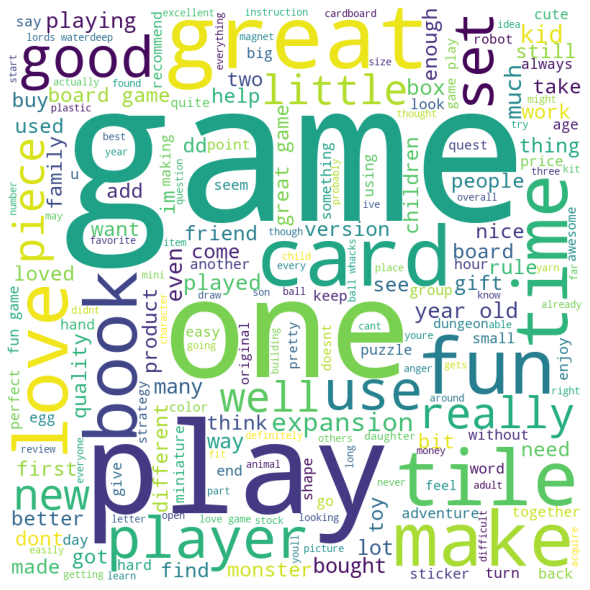

In [69]:
# Review: Plot the WordCloud image.
# Display the WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_review)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [70]:
# Summary: Create a word cloud.
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Define stop words
stop_words = set(stopwords.words('english'))

# Remove stop words from each row
df4['summary_token_no_stopwords'] = df4['summary_token'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Combine all the tokens in all the rows
all_tokens = [word for review in df4['summary_token_no_stopwords'] for word in review]

# Join all the tokens into a single string
text = ' '.join(all_tokens)

# Create WordCloud
wordcloud_summary = WordCloud(width=800, height=800, background_color='white').generate(text)

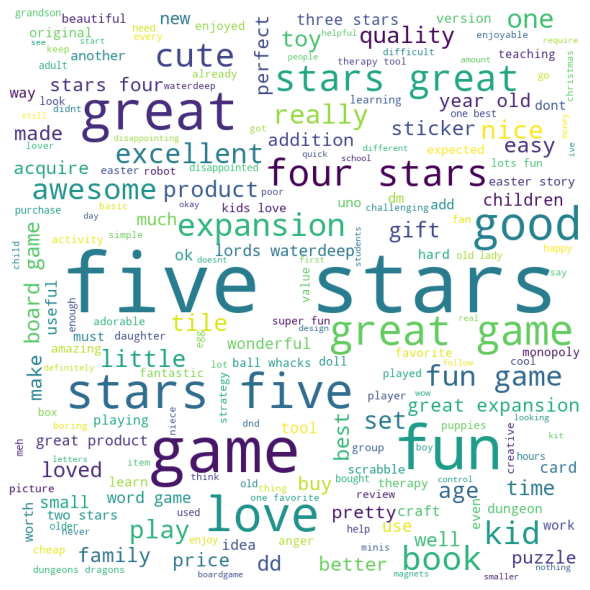

In [71]:
# Summary: Plot the WordCloud image.
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_summary)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [72]:
# Flatten the list of lists into a single list.
words_review = [word for review in df4['review_token_no_stopwords'] for word in review]

# Calculate the frequency distribution.
fdist_review = FreqDist(words_review)

# Preview data.
fdist_review

FreqDist({'game': 1671, 'great': 580, 'fun': 552, 'one': 530, 'play': 502, 'like': 414, 'love': 323, 'really': 319, 'get': 319, 'cards': 301, ...})

The output shows the frequency distribution of the words in the flattened list of all the reviews in the 'review_token_no_stopwords' column of df4. The words are ranked in order of their frequency, with the most frequent word at the top of the list. For example, the word 'game' appears 1671 times in the reviews, making it the most frequent word, followed by 'great' which appears 580 times, and so on. This information can be useful in identifying common themes and sentiments in the reviews.

In [73]:
# Flatten the list of lists into a single list.
words_summary = [word for review in df4['summary_token_no_stopwords'] for word in review]

# Calculate the frequency distribution.
fdist_summary = FreqDist(words_summary)

# Preview data.
fdist_summary

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'fun': 218, 'love': 93, 'good': 92, 'four': 58, 'like': 54, 'expansion': 52, ...})

The output is a frequency distribution of the words in the 'summary_token_no_stopwords' column of the DataFrame df4. The FreqDist function has calculated the frequency of each unique word in the list 'words_summary' and stored the results in a dictionary-like object. The keys of this object are the unique words in the list, and the values are the frequency count of each word. For example, the word 'stars' appears 427 times in the 'summary_token_no_stopwords' column, and the word 'five' appears 342 times.

### 4b) Remove alphanumeric characters and stopwords

In [74]:
# Delete all the alpanum.
# Completed in 2a 

In [75]:
# Remove all the stopwords
# Completed in 3 

### 4c) Create wordcloud without stopwords

In [76]:
# Create a wordcloud without stop words.
# Completed in 3 

In [77]:
# Plot the wordcloud image.
# Completed in 3 

### 4d) Identify 15 most common words and polarity

In [78]:
# Listing the 15 most common words in the review

import pandas as pd

# Get the top 15 words with highest frequency.
review_top_words = fdist_review.most_common(15)

# Create a dataframe from the list of words and their frequency.
df_review_top_words = pd.DataFrame(review_top_words, columns=['Word', 'Frequency'],index=range(1,16))

# Print the dataframe.
print(df_review_top_words)

      Word  Frequency
1     game       1671
2    great        580
3      fun        552
4      one        530
5     play        502
6     like        414
7     love        323
8   really        319
9      get        319
10   cards        301
11   tiles        297
12    time        291
13    good        289
14   would        280
15    book        273


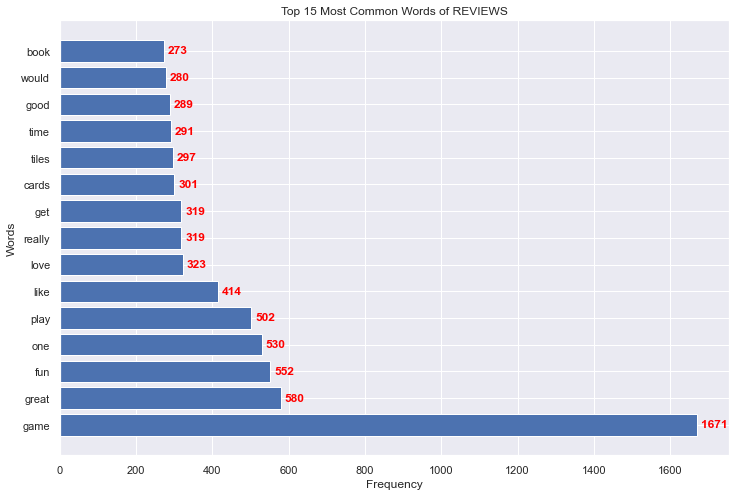

In [98]:
# Horizontal Barplot: 15 most common words in review

import matplotlib.pyplot as plt

# Get the top 15 words with highest frequency.
review_top_words = fdist_review.most_common(15)

# Create lists of words and their frequencies for plotting.
review_words = [word[0] for word in review_top_words]
review_freqs = [word[1] for word in review_top_words]

# Plot the horizontal barchart.
plt.barh(range(len(review_words)), review_freqs, tick_label=review_words)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 15 Most Common Words of REVIEWS')

# Add labels to the bars
for i, v in enumerate(review_freqs):
    plt.text(v + 10, i - 0.1, str(v), color='RED', fontweight='bold')

plt.show()

In [80]:
# Listing the 15 most common words in the summary

import pandas as pd

# Get the top 15 words with highest frequency.
summary_top_words = fdist_summary.most_common(15)

# Create a dataframe from the list of words and their frequency.
df_summary_top_words = pd.DataFrame(summary_top_words, columns=['Word', 'Frequency'],index=range(1,16))

# Print the dataframe.
print(df_summary_top_words)

         Word  Frequency
1       stars        427
2        five        342
3        game        319
4       great        295
5         fun        218
6        love         93
7        good         92
8        four         58
9        like         54
10  expansion         52
11       kids         50
12       cute         45
13       book         43
14        one         38
15    awesome         36


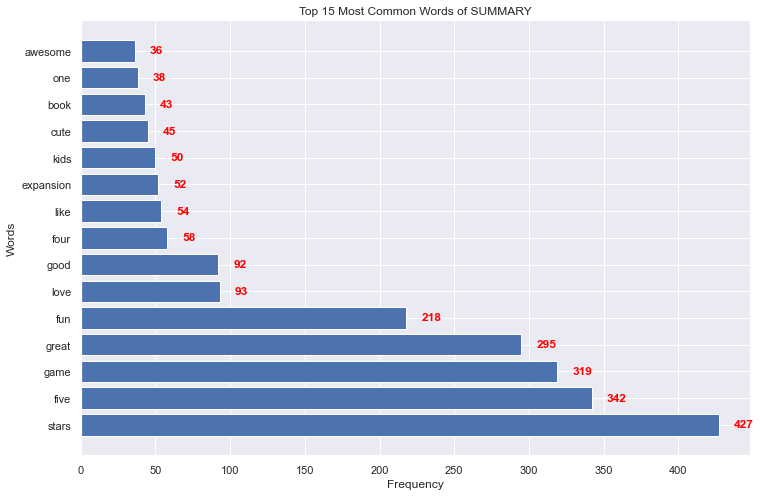

In [101]:
# Horizontal Barplot: 15 most common words in summary

import matplotlib.pyplot as plt

# Get the top 15 words with highest frequency.
summary_top_words = fdist_summary.most_common(15)

# Create lists of words and their frequencies for plotting.
summary_words = [word[0] for word in summary_top_words]
summary_freqs = [word[1] for word in summary_top_words]

# Plot the horizontal barchart.
plt.barh(range(len(summary_words)), summary_freqs, tick_label=summary_words)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 15 Most Common Words of SUMMARY')

# Add labels to the bars
for i, v in enumerate(summary_freqs):
    plt.text(v + 10, i - 0.1, str(v), color='RED', fontweight='bold')

plt.show()


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [82]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [83]:
# Determine polarity of Review
from textblob import TextBlob

# Create a new column in df4 containing the polarity scores of the reviews.
df4['review_polarity_score'] = df4['review_token_no_stopwords'].apply(lambda x: TextBlob(' '.join(x)).sentiment.polarity)

# View output, Print the first 5 rows of df4 with the polarity scores column.
print(df4.head()['review_polarity_score'])

0   -0.242857
1   -0.019468
2    0.118243
3    0.578788
4   -0.316667
Name: review_polarity_score, dtype: float64


In [84]:
# Create a new column in df4 containing the subjectivity scores of the reviews.
df4['review_subjectivity_score'] = df4['review_token_no_stopwords'].apply(lambda x: TextBlob(' '.join(x)).sentiment.subjectivity)

# View output, Print the first 5 rows of df4 with the subjectivity scores column.
print(df4.head()['review_subjectivity_score'])

0    0.428571
1    0.438796
2    0.417217
3    0.784848
4    0.316667
Name: review_subjectivity_score, dtype: float64


In [85]:
# Determine polarity of Summary
from textblob import TextBlob

# Create a new column in df4 containing the polarity scores of the summary.
df4['summary_polarity_score'] = df4['summary_token_no_stopwords'].apply(lambda x: TextBlob(' '.join(x)).sentiment.polarity)

# View output, Print the first 5 rows of df4 with the polarity scores column.
print(df4.head()['summary_polarity_score'])

0   -0.6
1   -0.8
2    0.0
3    0.0
4    0.0
Name: summary_polarity_score, dtype: float64


In [86]:
# Create a new column in df4 containing the subjectivity scores of the summary.
df4['summary_subjectivity_score'] = df4['summary_token_no_stopwords'].apply(lambda x: TextBlob(' '.join(x)).sentiment.subjectivity)

# View output, Print the first 5 rows of df4 with the subjectivity scores column.
print(df4.head()['summary_subjectivity_score'])

0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: summary_subjectivity_score, dtype: float64


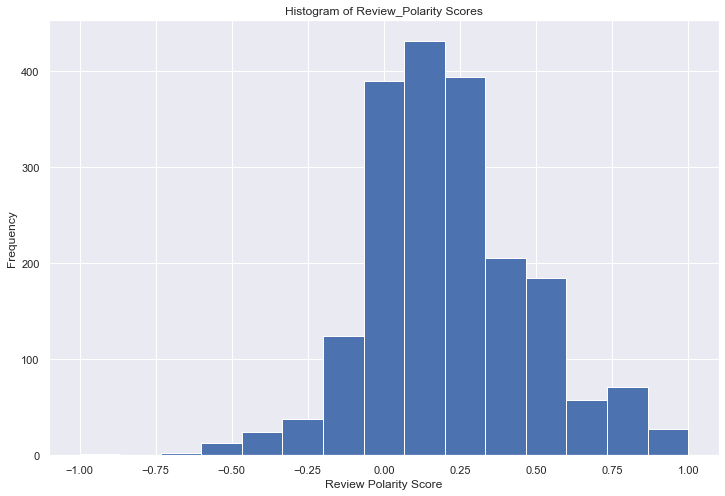

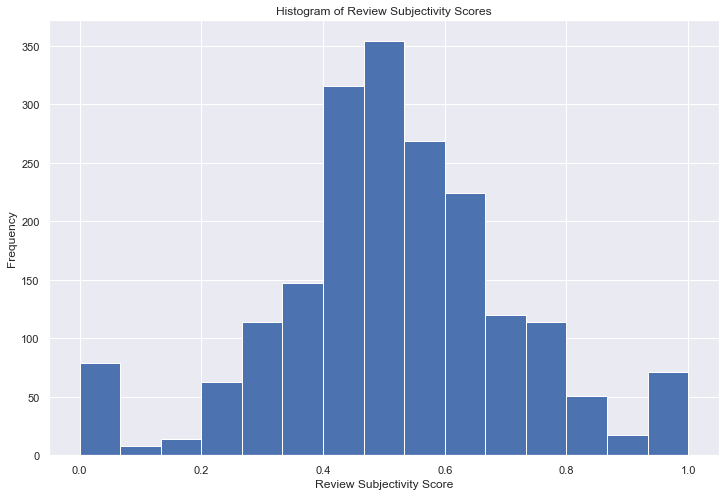

In [87]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
import matplotlib.pyplot as plt

# Create a histogram of the polarity scores in df4.
plt.hist(df4['review_polarity_score'], bins=15)
plt.xlabel('Review Polarity Score')
plt.ylabel('Frequency')
plt.title('Histogram of Review_Polarity Scores')
plt.show()

# Histogram of subjectivity score
import matplotlib.pyplot as plt

# Create a histogram of the subjectivity scores in df4.
plt.hist(df4['review_subjectivity_score'], bins=15)
plt.xlabel('Review Subjectivity Score')
plt.ylabel('Frequency')
plt.title('Histogram of Review Subjectivity Scores')
plt.show()


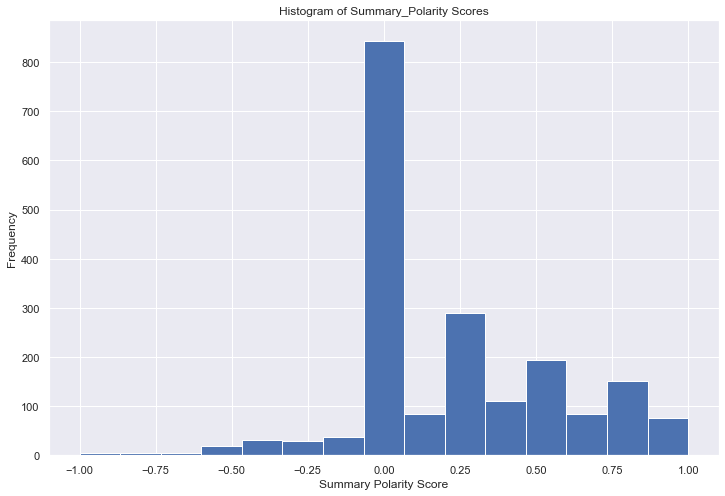

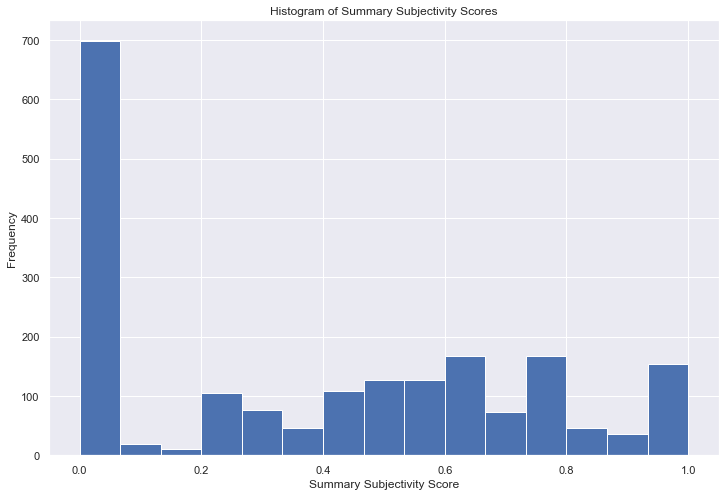

In [88]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
import matplotlib.pyplot as plt

# Create a histogram of the polarity scores in df4.
plt.hist(df4['summary_polarity_score'], bins=15)
plt.xlabel('Summary Polarity Score')
plt.ylabel('Frequency')
plt.title('Histogram of Summary_Polarity Scores')
plt.show()

# Histogram of sentiment score
import matplotlib.pyplot as plt

# Create a histogram of the subjectivity scores in df4.
plt.hist(df4['summary_subjectivity_score'], bins=15)
plt.xlabel('Summary Subjectivity Score')
plt.ylabel('Frequency')
plt.title('Histogram of Summary Subjectivity Scores')
plt.show()

In [89]:
import pandas as pd

# calculate summary statistics for the polarity and subjectivity scores in df4
summary_polarity_stats = df4['summary_polarity_score'].describe()
summary_subjectivity_stats = df4['summary_subjectivity_score'].describe()
review_polarity_stats = df4['review_polarity_score'].describe()
review_subjectivity_stats = df4['review_subjectivity_score'].describe()

# create a new dataframe with the summary statistics
summary_stats = pd.DataFrame({'Summary Polarity Score': summary_polarity_stats, 'Summary Subjectivity Score': summary_subjectivity_stats,'Review Polarity Score': review_polarity_stats, 'Review Subjectivity Score': review_subjectivity_stats})

# print the summary statistics table
print(summary_stats)


       Summary Polarity Score  Summary Subjectivity Score  \
count             1961.000000                 1961.000000   
mean                 0.224019                    0.381157   
std                  0.340938                    0.342223   
min                 -1.000000                    0.000000   
25%                  0.000000                    0.000000   
50%                  0.100000                    0.400000   
75%                  0.500000                    0.650000   
max                  1.000000                    1.000000   

       Review Polarity Score  Review Subjectivity Score  
count            1961.000000                1961.000000  
mean                0.210693                   0.512868  
std                 0.268037                   0.199881  
min                -1.000000                   0.000000  
25%                 0.033333                   0.414081  
50%                 0.178125                   0.505119  
75%                 0.358333                

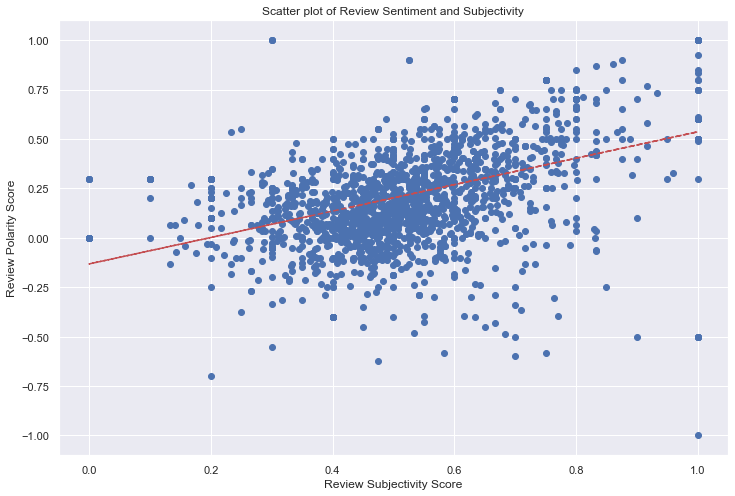

In [96]:
import numpy as np
import matplotlib.pyplot as plt

# Create a scatter plot of the sentiment and subjectivity scores in df4.
plt.scatter(df4['review_subjectivity_score'], df4['review_polarity_score'])
plt.xlabel('Review Subjectivity Score')
plt.ylabel('Review Polarity Score')
plt.title('Scatter plot of Review Sentiment and Subjectivity')

# Fit a first-degree polynomial regression line to the data
x = df4['review_subjectivity_score']
y = df4['review_polarity_score']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, 'r--')

plt.show()



In [97]:
import pandas as pd

# Calculate the correlation between the sentiment and subjectivity scores of the reviews
correlation = df4['review_subjectivity_score'].corr(df4['review_polarity_score'])
print('Correlation between review sentiment and subjectivity:', correlation)


Correlation between review sentiment and subjectivity: 0.4984778709892843


In [ ]:
# The correlation coefficient between the review sentiment and subjectivity scores is 0.4985, which indicates a moderate positive correlation between these two variables. This means that as the subjectivity score of a review increases, the polarity score also tends to increase, and vice versa.

# The correlation coefficient value of 0.4985 suggests that the relationship between the sentiment and subjectivity of the reviews is not very strong, but still significant enough to be worth considering. It is important to note that correlation does not imply causation, so we cannot conclude that one variable is causing changes in the other variable based on this correlation coefficient alone.

# In general, a correlation coefficient between 0.3 and 0.7 is considered to indicate a moderate correlation, while a value above 0.7 is considered a strong correlation. A value below 0.3 indicates a weak correlation. Therefore, the moderate correlation coefficient value of 0.4985 suggests that the sentiment and subjectivity of the reviews are related, but there may be other factors influencing these variables as well.

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [91]:
# Get the top 20 negative reviews.
top_negative_reviews = df4.nsmallest(20, 'review_polarity_score')['review']

# View output.
print('Top 20 Negative Reviews:')
print(top_negative_reviews)

Top 20 Negative Reviews:
208     booo unles you are patient know how to measure...
526     keeps clients engaged while helping them devel...
174     i sent this product to my granddaughter the po...
182                     incomplete kit very disappointing
538     i purchased this on the recommendation of two ...
1804    im sorry i just find this product to be boring...
364     one of my staff will be using this game soon s...
117     i bought this as a christmas gift for my grand...
173     horrible nothing more to say would give zero s...
227     this was a gift for my daughter i found it dif...
230                      i found the directions difficult
290                instructions are complicated to follow
301                                             difficult
1524                           expensive for what you get
1424    one word of caution if you use either expansio...
1058    i like wizards of the coasts game not bad i th...
347     my 8 yearold granddaughter and i were v

In [92]:
# Top 20 negative summaries.
top_negative_summaries = df4.nsmallest(20, 'summary_polarity_score')['summary']

# View output.
print('Top 20 Negative Summaries:')
print(top_negative_summaries)

Top 20 Negative Summaries:
21                          the worst value ive ever seen
173     horrible nothing more to say would give zero s...
208      boring unless you are a craft person which i am 
829                                                boring
1166    before this i hated running any rpg campaign d...
1       another worthless dungeon masters screen from ...
144                                          disappointed
631                                          disappointed
793                                          disappointed
1620                                         disappointed
363     promotes anger instead of teaching calming met...
885              too bad this is not what i was expecting
890                          bad qualityall made of paper
101                                      small and boring
518                                            mad dragon
0       the fact that 50 of this space is wasted on ar...
805                                         d

In [93]:
# Get the top 20 positive reviews.
top_positive_reviews = df4.nlargest(20, 'review_polarity_score')['review']


# View output.
print('Top 20 Positive Reviews:')
print(top_positive_reviews)

Top 20 Positive Reviews:
7                               came in perfect condition
165                                          awesome book
194                                          awesome gift
496     excellent activity for teaching selfmanagement...
524                           perfect just what i ordered
591                                     wonderful product
609                                    delightful product
621     wonderful for my grandson to learn the resurre...
790                                               perfect
933                                               awesome
1135                                          awesome set
1168                 best set buy 2 if you have the means
1177                 awesome addition to my rpg gm system
1301                                          its awesome
1401    one of the best board games i played in along ...
1550    my daughter loves her stickers awesome seller ...
1609    this was perfect to go with the 7 bean 

In [94]:
# Top 20 positive summaries.
top_positive_summaries = df4.nlargest(20, 'summary_polarity_score')['summary']

# View output.
print('Top 20 Positive Summaries:')
print(top_positive_summaries)

Top 20 Positive Summaries:
6                                    best gm screen ever
28                                     wonderful designs
32                                               perfect
80     theyre the perfect size to keep in the car or ...
134                              perfect for preschooler
140               awesome sticker activity for the price
161                                         awesome book
187                                              awesome
210             awesome and welldesigned for 9 year olds
418                                              perfect
475                                            excellent
543                                            excellent
548                               excellent therapy tool
580    the pigeon is the perfect addition to a school...
599                            best easter teaching tool
647                                            wonderful
651                all f the mudpuppy toys are wonderful
657 

## 7. Discuss: Insights and observations

***Your observations here...***

The frequency distribution of words in the reviews and summaries can be helpful in identifying common themes and sentiments.

The most frequent words in the reviews are "game", "great", "fun", "one", "play", "like", "love", "really", "get", "cards", etc.

The most frequent words in the summaries are "stars", "five", "game", "great", "fun", "love", "good", "four", "like", "expansion", etc.

The average summary polarity score is 0.224, indicating that the overall sentiment of the summaries is slightly positive.

The average summary subjectivity score is 0.381, indicating that the summaries are more objective than subjective on average.

The average review polarity score is 0.210, which is slightly lower than the summary polarity score. This suggests that the reviews are slightly less positive than the summaries.

The average review subjectivity score is 0.513, which is higher than the summary subjectivity score. This suggests that the reviews are more subjective than the summaries on average.

The standard deviation of the summary and review polarity scores is quite high (0.341 and 0.268, respectively), indicating that there is a large amount of variability in the sentiment of the summaries and reviews.

The minimum value for the summary polarity score is -1, which suggests that there are some very negative summaries in the dataset.

The maximum value for both the summary and review subjectivity scores is 1, indicating that there are some very subjective summaries and reviews in the dataset.